# ATDA 5340 - Final - Part 5 - ML Supervised - Denis Shilkin
<br>The dataset adult_salary.csv
<br> Decision tree (Classification) to predict if income more 50000 or less than 50000

## 1. Import libraries

In [1]:
# import libraries 
import pandas as pd
import numpy as np

from pandas import Series

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

print("Diagnostic: Libraries loaded")


Diagnostic: Libraries loaded


In [2]:
filename = "adult_salary.csv"

df = pd.read_csv(filename, index_col=False)

print(df.shape)

(48842, 15)


In [3]:
print(df.head(5))

   Age          Emp_type  Fnlwgt  Education  Education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

              Marital         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital_gain  Capital_loss  weekly_hours        Country Income  
0          2174             0            40  United-States  <=50K  
1             0             0            13  U

In [4]:
df2 = df[["Age","Emp_type","Education","Education_num","Marital","Occupation","Relationship",
       "Race","Sex","Capital_gain","Capital_loss","weekly_hours","Country","Income"]]
print(df2.shape)

(48842, 14)


In [5]:
print(df2.head(5))

   Age          Emp_type  Education  Education_num             Marital  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          Occupation   Relationship   Race     Sex  Capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   Capital_loss  weekly_hours        Country Income  
0             0            40  United-States  <=50K  
1             0            13  United-

In [6]:
print(df2.isnull().sum())

Age              0
Emp_type         0
Education        0
Education_num    0
Marital          0
Occupation       0
Relationship     0
Race             0
Sex              0
Capital_gain     0
Capital_loss     0
weekly_hours     0
Country          0
Income           0
dtype: int64


In [7]:
print(df2.groupby('Income').size())

Income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64


In [8]:
df2[['Income']]=df2[['Income']].replace("<=50K.",0)
df2[['Income']]=df2[['Income']].replace(">50K.",1)
df2[['Income']]=df2[['Income']].replace("<=50K",0)
df2[['Income']]=df2[['Income']].replace(">50K",1)
print(df2.groupby('Income').size())

Income
0    37155
1    11687
dtype: int64


In [9]:
print(df2.dtypes)

Age               int64
Emp_type         object
Education        object
Education_num     int64
Marital          object
Occupation       object
Relationship     object
Race             object
Sex              object
Capital_gain      int64
Capital_loss      int64
weekly_hours      int64
Country          object
Income            int64
dtype: object


In [10]:
# convert strings to numeric values
Sex = Series([0,1],index=['Male','Female'])    
df2['Sex']=df2.Sex.map(Sex)

df2.Emp_type = pd.Categorical(df2.Emp_type)
df2['Emp_type'] = df2.Emp_type.cat.codes

df2.Education = pd.Categorical(df2.Education)
df2['Education'] = df2.Education.cat.codes

df2.Marital = pd.Categorical(df2.Marital)
df2['Marital'] = df2.Marital.cat.codes

df2.Occupation = pd.Categorical(df2.Occupation)
df2['Occupation'] = df2.Occupation.cat.codes

df2.Relationship = pd.Categorical(df2.Relationship)
df2['Relationship'] = df2.Relationship.cat.codes

df2.Race = pd.Categorical(df2.Race)
df2['Race'] = df2.Race.cat.codes

df2.Country = pd.Categorical(df2.Country)
df2['Country'] = df2.Country.cat.codes

print(df2.dtypes)

Age              int64
Emp_type          int8
Education         int8
Education_num    int64
Marital           int8
Occupation        int8
Relationship      int8
Race              int8
Sex              int64
Capital_gain     int64
Capital_loss     int64
weekly_hours     int64
Country           int8
Income           int64
dtype: object


In [11]:
print(df2.describe())

                Age      Emp_type     Education  Education_num       Marital  \
count  48842.000000  48842.000000  48842.000000   48842.000000  48842.000000   
mean      38.643585      3.870439     10.288420      10.078089      2.618750   
std       13.710510      1.464234      3.874492       2.570973      1.507703   
min       17.000000      0.000000      0.000000       1.000000      0.000000   
25%       28.000000      4.000000      9.000000       9.000000      2.000000   
50%       37.000000      4.000000     11.000000      10.000000      2.000000   
75%       48.000000      4.000000     12.000000      12.000000      4.000000   
max       90.000000      8.000000     15.000000      16.000000      6.000000   

         Occupation  Relationship          Race           Sex  Capital_gain  \
count  48842.000000  48842.000000  48842.000000  48842.000000  48842.000000   
mean       6.577700      1.443287      3.668052      0.331518   1079.067626   
std        4.230509      1.602151      0.8

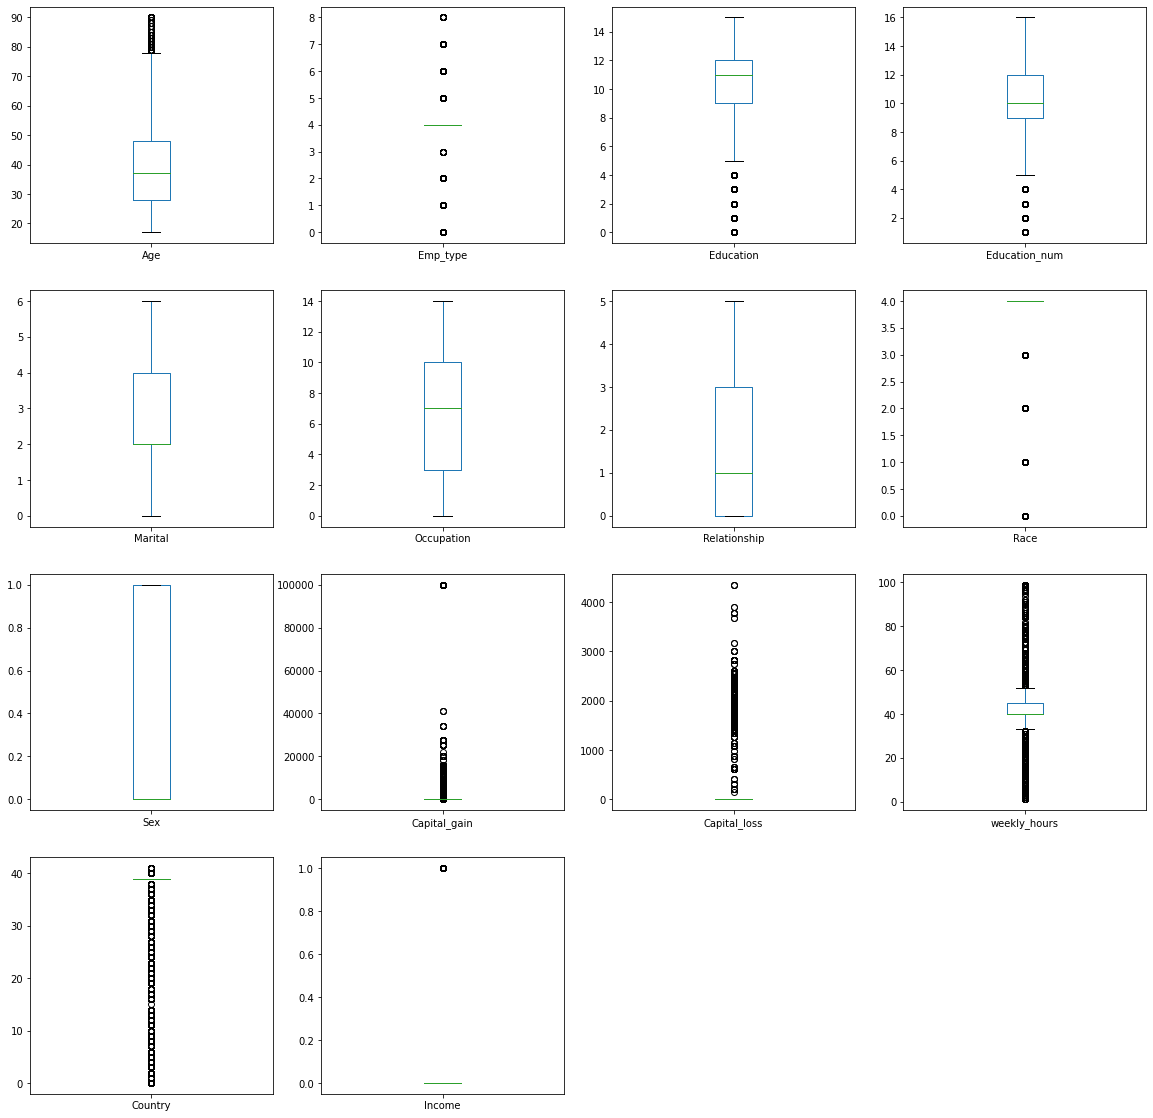

In [12]:
df2.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
pyplot.show()

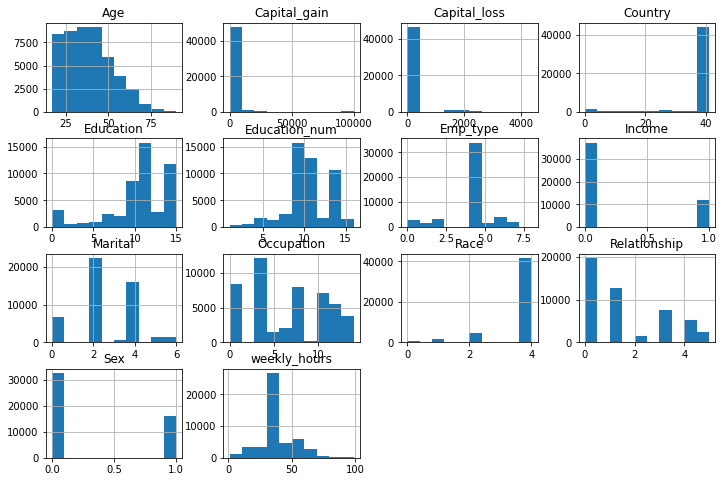

In [13]:
df2.hist(figsize=(12, 8))
pyplot.show()

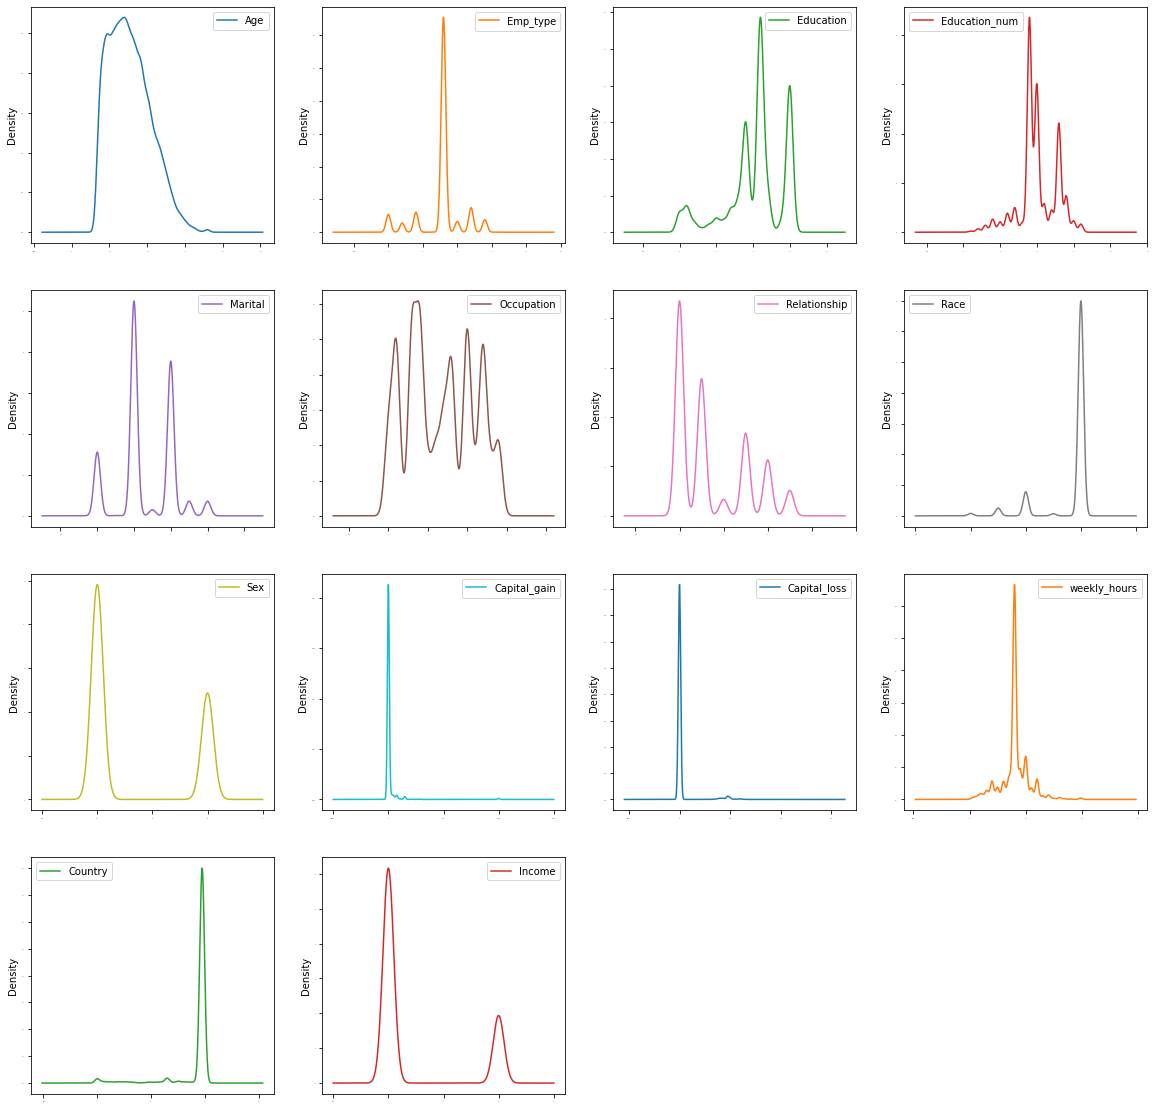

In [14]:
df2.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(20,20))
pyplot.show()

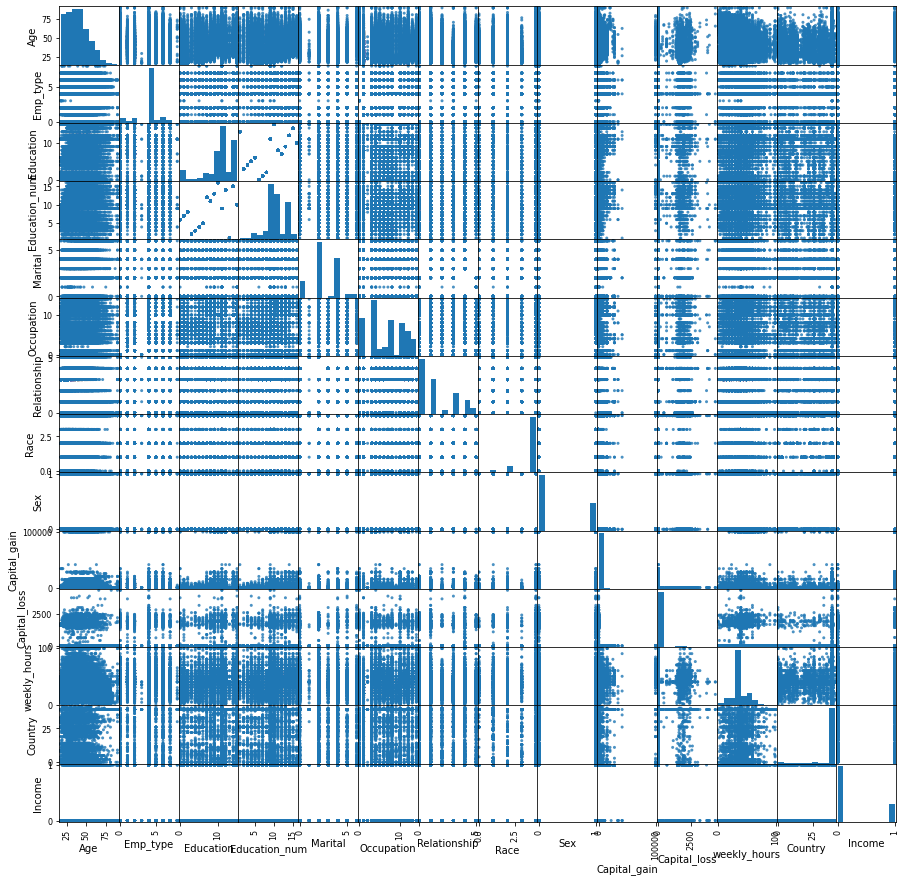

In [15]:
scatter_matrix(df2, alpha=0.8, figsize=(15,15))
pyplot.show()

In [16]:
array = df2.values

X = array [:,0:13]
Y = array [:,13]

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=seed)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
# check prediction
predict = model.predict(X_test)
report = classification_report(Y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      9243
           1       0.63      0.60      0.62      2968

    accuracy                           0.82     12211
   macro avg       0.75      0.75      0.75     12211
weighted avg       0.82      0.82      0.82     12211



In [18]:
# accuracy level
score = model.score(X_test, Y_test)
print(("%.3f%%") % (score*100.0))

81.836%


In [19]:
#Evaluate
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')

print("%.3f (%.3f)" % (results.mean(), results.std()))

0.820 (0.007)


In [20]:
#Predict new values

model.predict([[39,1,0,0,1,1,1,0,0,10000,500,60,0]])

array([0])

In [21]:
model.predict([[30,1,0,0,1,1,1,0,0,1000,50,60,0]])

array([0])